In [1]:
import numpy as np

Import fonction ACP

In [3]:
from sklearn.decomposition import PCA

Import des données

In [4]:
from sklearn.datasets import load_wine

values, target = load_wine(return_X_y=True)
target_names = load_wine().target_names
feature_names = load_wine().feature_names

Standardisation des données

In [5]:
from sklearn.preprocessing import StandardScaler
values_cr = StandardScaler().fit_transform(values)

 Paramètrage de l'ACP pour garder les deux premières composantes

In [6]:
pca=PCA(2)
pca_wine = pca.fit_transform(values_cr)

En sortie : le même nombre de lignes que les données en entrées et le nombre de variables correspondant au nombre de composantes conservées

In [7]:
pca_wine.shape

(178, 2)

Variance totale expliquée par nos deux composantes.

In [8]:
pca.explained_variance_ratio_.sum()

0.554063383569353

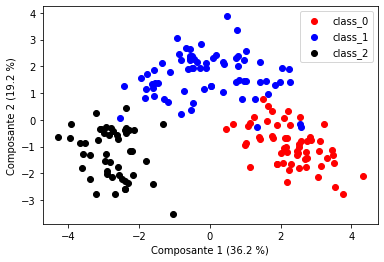

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

# On fait le plot
color = ["red", "blue", "black"]
for i in range(3):
    plt.scatter(pca_wine[target == i, 0], pca_wine[target == i, 1],
            c=color[i], label = target_names[i])
plt.xlabel('Composante 1 (' + str(round(pca.explained_variance_ratio_[0] * 100, 1)) + ' %)')
plt.ylabel('Composante 2 (' + str(round(pca.explained_variance_ratio_[1] * 100, 1)) + ' %)')
plt.legend()
plt.show()

Contribution des variables aux composantes

In [11]:
import pandas as pd
pd.DataFrame({"Noms des variables" : feature_names, "Composante 1" : pca.components_[0], "Composante 2" : pca.components_[1]})

,Noms des variables,Composante 1,Composante 2
0,alcohol,0.144329,-0.483652
1,malic_acid,-0.245188,-0.224931
2,ash,-0.002051,-0.316069
3,alcalinity_of_ash,-0.239320,0.010591
4,magnesium,0.141992,-0.299634
5,total_phenols,0.394661,-0.065040
6,flavanoids,0.422934,0.003360
7,nonflavanoid_phenols,-0.298533,-0.028779
8,proanthocyanins,0.313429,-0.039302
9,color_intensity,-0.088617,-0.529996


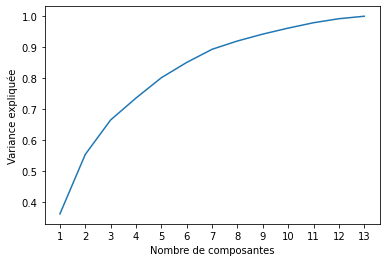

In [12]:
pca_graph = PCA().fit(values_cr)
plt.plot(np.cumsum(pca_graph.explained_variance_ratio_),)
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée')
plt.xticks(np.arange(len(pca_graph.explained_variance_ratio_)), np.arange(1, len(pca_graph.explained_variance_ratio_)+1))
plt.show()

In [13]:
# Plutôt que de renseigner le nombre de composantes 
# on renseigne la valeur minimum de la variance 
# expliquée totale que l'on souhaite
pca=PCA(0.70) 
wine_pca = pca.fit_transform(values_cr)

# On entraîne notre modèle et on l'évalue avec une 
# méthode de validation croisée 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
mean_pca = cross_val_score(clf, wine_pca, target, cv=5).mean()
mean_all = cross_val_score(clf, values, target, cv=5).mean()

pd.DataFrame({"Précision moyenne après ACP" : [mean_pca], 
              "Précision moyenne sans ACP" : [mean_all], 
              "Nombre de composantes" : [wine_pca.shape[1]]})

,Précision moyenne après ACP,Précision moyenne sans ACP,Nombre de composantes
0,0.933175,0.887619,4
